Import required libraries

In [2]:
import numpy as np
import hydrangea as hy
import matplotlib.pyplot as plt

For illustration, let's look at simulation CE-28. Construct a simulation object to handle file paths etc.

In [4]:
sim = hy.Simulation(28)

Construct the z = 0.1 (snapshot 26) snapshot and subfind files 

In [8]:
snapshot_file = sim.get_snapshot_file(26)
subfind_file = sim.get_subfind_file(26)

Set up a loader to extract the `Subhalo` data in the Subfind catalogue

In [5]:
sub = hy.SplitFile(subfind_file, 'Subhalo')

Prepared reading from 'SUBHALO'...


Get e.g. the stellar mass of all subhaloes (warning: might take a bit of time). Units are solar mass.

/software/rhel7/lib64/python3.6/site-packages/ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in log10
  


(array([2120., 1572., 1164.,  821.,  644.,  430.,  258.,  106.,   29.,
          16.]),
 array([ 9. ,  9.3,  9.6,  9.9, 10.2, 10.5, 10.8, 11.1, 11.4, 11.7, 12. ],
       dtype=float32),
 <BarContainer object of 10 artists>)

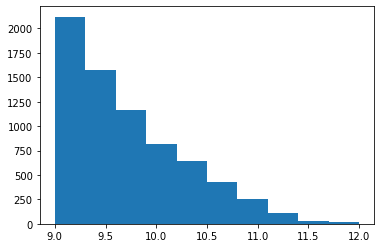

In [14]:
mstar = sub.MassType[:, 4]
plt.hist(np.log10(mstar), range=[9.0, 12.0])

If we are only interested in the BCG (subhalo index 0), we can take a shortcut to only extract the properties of this one subhalo

In [6]:
sub_bcg = hy.SplitFile(subfind_file, 'Subhalo', read_index=0)

Prepared reading from 'SUBHALO'...


In [18]:
print(f"The BCG has a stellar mass of {sub_bcg.MassType[4]:.2e} M_Sun.")

The BCG has a stellar mass of 5.81e+12 M_Sun.


Load stellar particles within 50 kpc from the BCG centre.
Arguments here are: snapshot file (constructed above) -- particle type code (4: stars) -- centre of the region we are interested in (BCG centre of potential) -- radius of the selection sphere in Mpc -- strictly exclude particles outside the specified region

In [25]:
stars = hy.ReadRegion(snapshot_file, 4, sub_bcg.CentreOfPotential, 0.05, exact=True)

Checking 1 cells...
Reading 'Coordinates' took 1.859 sec.
Region setup took 2.760 sec.
Selection region contains 1 cells, 16 segments, 7155514 particles, 16 files
Exact selection region contains 857773 particles.


As an illustration, plot the stellar birth expansion factor vs. metallicity (absolute, not relative to Solar):

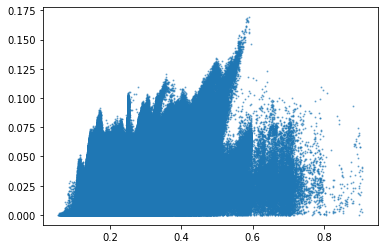

In [29]:
plt.scatter(stars.StellarFormationTime, stars.SmoothedMetallicity, s=1, alpha=0.5)